# Pandas III: Grouping

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pydataset import data

### Problem 1
#### iris

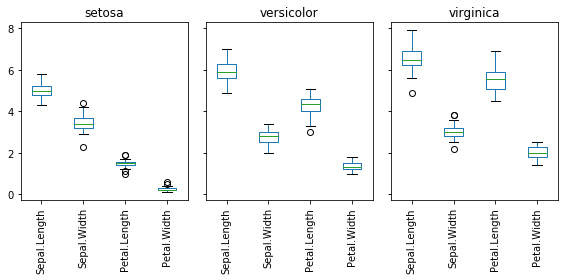

In [2]:
iris = data("iris")
# Group data by Species 
iris_s = iris.groupby("Species")
# Box plot for each species
iris_s.boxplot(grid=False, rot=90, figsize=(8,4), layout=(1,3))
plt.tight_layout()
plt.show()

from the box plots we could see that the "setosa" species has very small petal compared to the sepal hence it is very easy to distinguish it compared to others. Also, the petal the petal length in in increasing order from setosa, versicolor & virginica, therefore if we arrange the data in order of petal length, we could predict the species of the flowers.
#### Poison

In [3]:
poisons = data("poisons")
bypoison = poisons.groupby("poison")
bypoison.time.mean()

poison
1    0.617500
2    0.544375
3    0.276250
Name: time, dtype: float64

In [4]:
# Group data by treatment first
treat = poisons.groupby("treat")
print(treat.time.mean(), "\n")

# group data by poison & then by treatment
treat1 = bypoison.get_group(1).groupby("treat")
print(treat1.time.mean())

treat
A    0.314167
B    0.676667
C    0.392500
D    0.534167
Name: time, dtype: float64 

treat
A    0.4125
B    0.8800
C    0.5675
D    0.6100
Name: time, dtype: float64


It is clear that the time to death for poison 3 is the fastest. Hence, this is the deadliest poison in general.
If the poison type is not known, then we should go for treatments A, C, D & B in that order. If the poison type is known, specific strategies need to be followed for each poison type by grouping the data by poison first & then treatment.
#### Diamonds

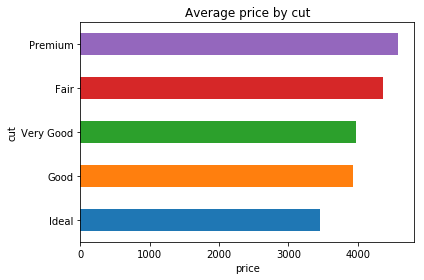

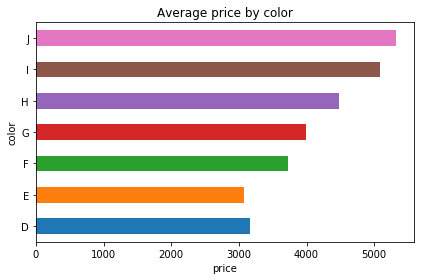

x         y         z      depth      table
color cut                                                          
F     Fair       5.990513  5.931122  3.787821  63.508013  59.453205
E     Fair       5.909063  5.858214  3.722143  63.319643  59.364732
I     Fair       6.564457  6.493486  4.193486  64.220571  59.237143
D     Fair       6.018344  5.963190  3.839877  64.048466  58.969325
J     Fair       6.747311  6.675882  4.319664  64.357143  58.917647
F     Good       5.693443  5.709659  3.544609  62.202310  58.910891
J     Premium    6.809975  6.770644  4.168020  61.390099  58.874752
      Good       6.377003  6.386026  3.977459  62.395765  58.813029
H     Premium    6.244508  6.228110  3.811699  61.322034  58.792034
E     Good       5.617889  5.632454  3.496066  62.203751  58.779957
      Premium    5.587116  5.558353  3.408875  61.175909  58.779461
I     Good       6.253544  6.260536  3.901513  62.475096  58.773946
G     Fair       6.173822  6.114076  3.963153  64.339809  58.773248
I     Premium    6.489531  6.453270  3.963894  61.328641  58.771849
D     Premium    5.599869  5.571472  3.415926  61.169245  58.718964
G     Premium    5.864254  5.833345  3.579641  61.279480  58.702360
H     Fair       6.579373  6.497393  4.219373  64.585149  58.696370
F     Premium    5.876692  5.844655  3.588391  61.259974  58.679279
H     Good       5.968789  5.974245  3.726937  62.499573  58.611111
D     Good       5.620076  5.633897  3.504864  62.365710  58.541541
G     Good       5.850264  5.862824  3.647922  62.526636  58.471986
J     Very Good  6.460782  6.495074  4.006873  61.902065  58.277729
I     Very Good  6.272259  6.299028  3.890972  61.934551  58.105150
D     Very Good  5.501210  5.531613  3.405089  61.750165  58.041309
E     Very Good  5.432467  5.463213  3.373996  61.730250  58.038875
H     Very Good  5.982286  6.006272  3.713849  61.968366  57.903015
F     Very Good  5.610504  5.642717  3.472902  61.721627  57.848429
G     Very Good  5.660204  5.688752  3.509883  61.841279  57.784428
I     Ideal      5.976197  5.989479  3.695270  61.793598  56.021357
J     Ideal      6.320045  6.332098  3.912757  61.821987  56.012612
E     Ideal      5.215762  5.232214  3.220346  61.686677  55.967461
H     Ideal      5.731377  5.740446  3.539917  61.733194  55.965843
D     Ideal      5.186704  5.196224  3.201800  61.678370  55.965632
F     Ideal      5.408751  5.422250  3.338732  61.675562  55.924203
G     Ideal      5.511214  5.524007  3.403120  61.700164  55.902375

In [5]:
diamonds = data("diamonds")
cut = diamonds.groupby("cut")
color = diamonds.groupby('color')
colorcut = diamonds.groupby(["color", "cut"])
cut['price'].mean().sort_values().plot(kind='barh', title="Average price by cut")
plt.xlabel('price')
plt.tight_layout()
plt.show()
color['price'].mean().plot(kind='barh', title="Average price by color")
plt.xlabel('price')
plt.tight_layout()
plt.show()
colorcut["x", "y", "z", "depth", "table"].mean().sort_values(["table", "depth"], ascending=False)

From the above, it is clear that the price of diamonds depend upon the color and cut. As on goes from E to J the price increases. The distribution is not so intutive with respect to the cut. As we can see that "Fair" has the second highest cost after "premium". "Good", "Very Good" and "Ideal" shoud have had higher prices as they are superior to fair. This non-intuitive behaviour can be explained by the fact that the fair cut diamonds are generally of larger size as can be seen from the last table.

### Problem 3

In [6]:
titanic = pd.read_csv("titanic.csv")
titanic.pivot_table(values="Survived", columns="Embarked", aggfunc="mean")
titanic.pivot_table(values="Survived", index=['Sex'], columns="Embarked", aggfunc="mean")
titanic.pivot_table(values="Survived", index=['Sex'], columns="Embarked", aggfunc="mean")
agedist = pd.cut(titanic.Age, [0,30,60,90])
titanic.pivot_table(values="Survived", index=['Sex',agedist], columns="Embarked", aggfunc="mean")

Embarked                C         Q         S
Sex    Age                                   
female (0, 30]   0.921569  0.529412  0.658683
       (30, 60]  0.934783  0.285714  0.804348
       (60, 90]  1.000000       NaN  0.800000
male   (0, 30]   0.406780  0.153846  0.185430
       (30, 60]  0.340000  0.000000  0.170854
       (60, 90]  0.000000  0.000000  0.117647